# Assignment 3

## Penjelasan Data 

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan "yes" (ya) atau "no" (tidak) berlangganan.

## Penjelasan Atribut

### Daftar Atribut Kategorikal:

1. job

("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

2. marital

("divorced","married","single","unknown")

note: "divorced" means divorced or widowed

3. education

("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

4. default

("no","yes","unknown")

5. housing

("no","yes","unknown")

6. loan

("no","yes","unknown")

7. contact

("cellular","telephone")

8. month

("jan", "feb", "mar", ..., "nov", "dec")

9. day_of_week

("mon","tue","wed","thu","fri")

10. poutcome

("failure","nonexistent","success")

11. y (target)

("yes","no")

### Daftar Atribut Numerikal:

- Age
- duration (in seconds)
- campaign
- pdays

(999 means client was not previously contacted)
- previous
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.eployed

In [42]:
#import data

#preprocess
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#teknik sampling
from imblearn.over_sampling import SMOTE

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [43]:
#load data

bank_data = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=";")
test_bank_data = pd.read_csv('data/bank-additional/bank-additional.csv')

In [44]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
#dimensi data
bank_data.shape

(41188, 21)

41188 data & 21 kolom

In [46]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Grouping data into Numerical & Categorical Data

In [47]:
numerical       = list(bank_data.select_dtypes(include=['int64']).columns.values) + list(bank_data.select_dtypes(include=['float64']).columns.values)
categorical     = list(bank_data.select_dtypes(include=['object']))

In [48]:
numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [49]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### Visualisasi Data

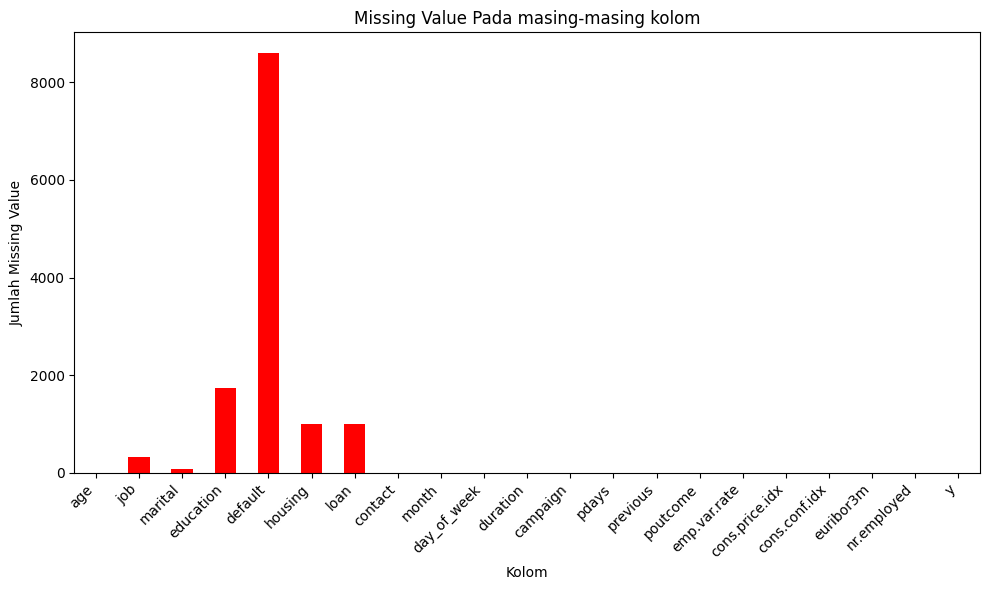

In [50]:
#unknown data = missing value
bank_data.replace('unknown', pd.NA, inplace=True)

# Summary of missing values in the dataset
missing_values_summary = bank_data.isna().sum()

# Buat Chart nya
plt.figure(figsize=(10, 6))
missing_values_summary.plot(kind='bar', color='red')
plt.title('Missing Value Pada masing-masing kolom')
plt.ylabel('Jumlah Missing Value')
plt.xlabel('Kolom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [51]:
missing_values_summary

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

missing value paling banyak di kolom default.

missing value akan di explore masing-masing kolom.


#### handle missing value pada kolom 'job'

In [52]:
# Mencari nilai modus (yang paling sering muncul)
modus_job = bank_data['job'].mode()[0]  

# Mengisi nilai kosong (missing value) pada kolom 'job' dengan modus
bank_data['job'].fillna(modus_job, inplace=True)

# Mengecek kembali apakah masih ada missing value di kolom 'job'
bank_data['job'].isnull().sum()


0

#### handle missing value pada kolom 'marital'

In [53]:
# Mengecek nilai modus pada kolom 'marital' untuk imputasi
modus_marital = bank_data['marital'].mode()[0]

# Mengisi nilai kosong (missing value) pada kolom 'marital' dengan modus
bank_data['marital'].fillna(modus_marital, inplace=True)

# Mengecek kembali apakah masih ada missing value di kolom 'marital'
bank_data['marital'].isnull().sum()


0

#### handle missing value pada kolom 'education'

In [54]:
# Mengecek nilai modus pada kolom 'education' untuk imputasi
mode_education = bank_data['education'].mode()[0]

# Mengisi nilai kosong (missing value) pada kolom 'education' dengan modus
bank_data['education'].fillna(mode_education, inplace=True)

# Mengecek kembali apakah masih ada missing value di kolom 'education'
bank_data['education'].isnull().sum()


0

#### handle missing value pada kolom 'default'

In [55]:
# Mengecek nilai modus pada kolom 'education' untuk imputasi
modus_default = bank_data['default'].mode()[0]

# Mengisi nilai kosong (missing value) pada kolom 'education' dengan modus
bank_data['default'].fillna(modus_default, inplace=True)

# Mengecek kembali apakah masih ada missing value di kolom 'education'
bank_data['default'].isnull().sum()

0

#### handle missing value pada kolom 'housing'

In [56]:
# Mengecek nilai modus pada kolom 'housing' untuk imputasi
modus_housing = bank_data['housing'].mode()[0]

# Mengisi nilai kosong (missing value) pada kolom 'education' dengan modus
bank_data['housing'].fillna(modus_housing, inplace=True)

# Mengecek kembali apakah masih ada missing value di kolom 'education'
bank_data['housing'].isnull().sum()

0

#### handle missing value pada kolom 'loan'

In [57]:
# Mengecek nilai modus pada kolom 'loan' untuk imputasi
modus_loan = bank_data['loan'].mode()[0]

# Mengisi nilai kosong (missing value) pada kolom 'education' dengan modus
bank_data['loan'].fillna(modus_loan, inplace=True)

# Mengecek kembali apakah masih ada missing value di kolom 'education'
bank_data['loan'].isnull().sum()

0

In [58]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

sudah tidak ada missing value yg terlihat.

yang mengalami missing value adalah kolom categorical, sehingga cara imputasinya dengan modus. 

data categorical tidak memiliki median / rata-rata, sehingga pendekatan yg digunakan adalah dengan modus.

saat ini sudah tidak ada missing values

#### Perbandingan yg ambil tabungan Deposito & tidak

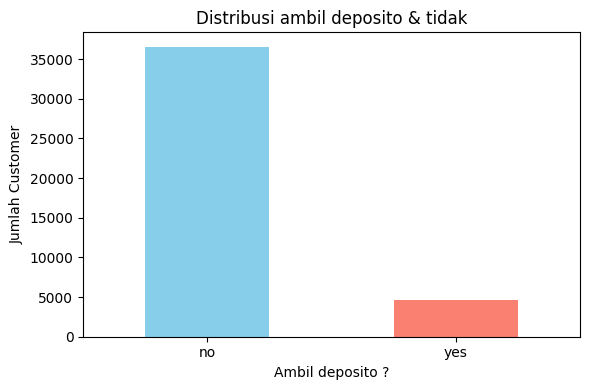

In [59]:
plt.figure(figsize=(6,4))
bank_data['y'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi ambil deposito & tidak')
plt.ylabel('Jumlah Customer')
plt.xlabel('Ambil deposito ?')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


data sangat tidak balance. jumlah 'no' lebih tinggi sehingga ketika di buat ML , akan ada kecenderungan hanya bisa memprediksi customer yg tidak ambil deposito.

sehingga data harus di beri treatment supaya data seimbang terlebih dahulu. 

metode yg akan saya ambil adalah SMOTE (Synthetic Minority Oversampling Technique)

pada saat akan train ML, akan di terapkan

#### Visualisasi dari numerical columns

<Figure size 1200x800 with 0 Axes>

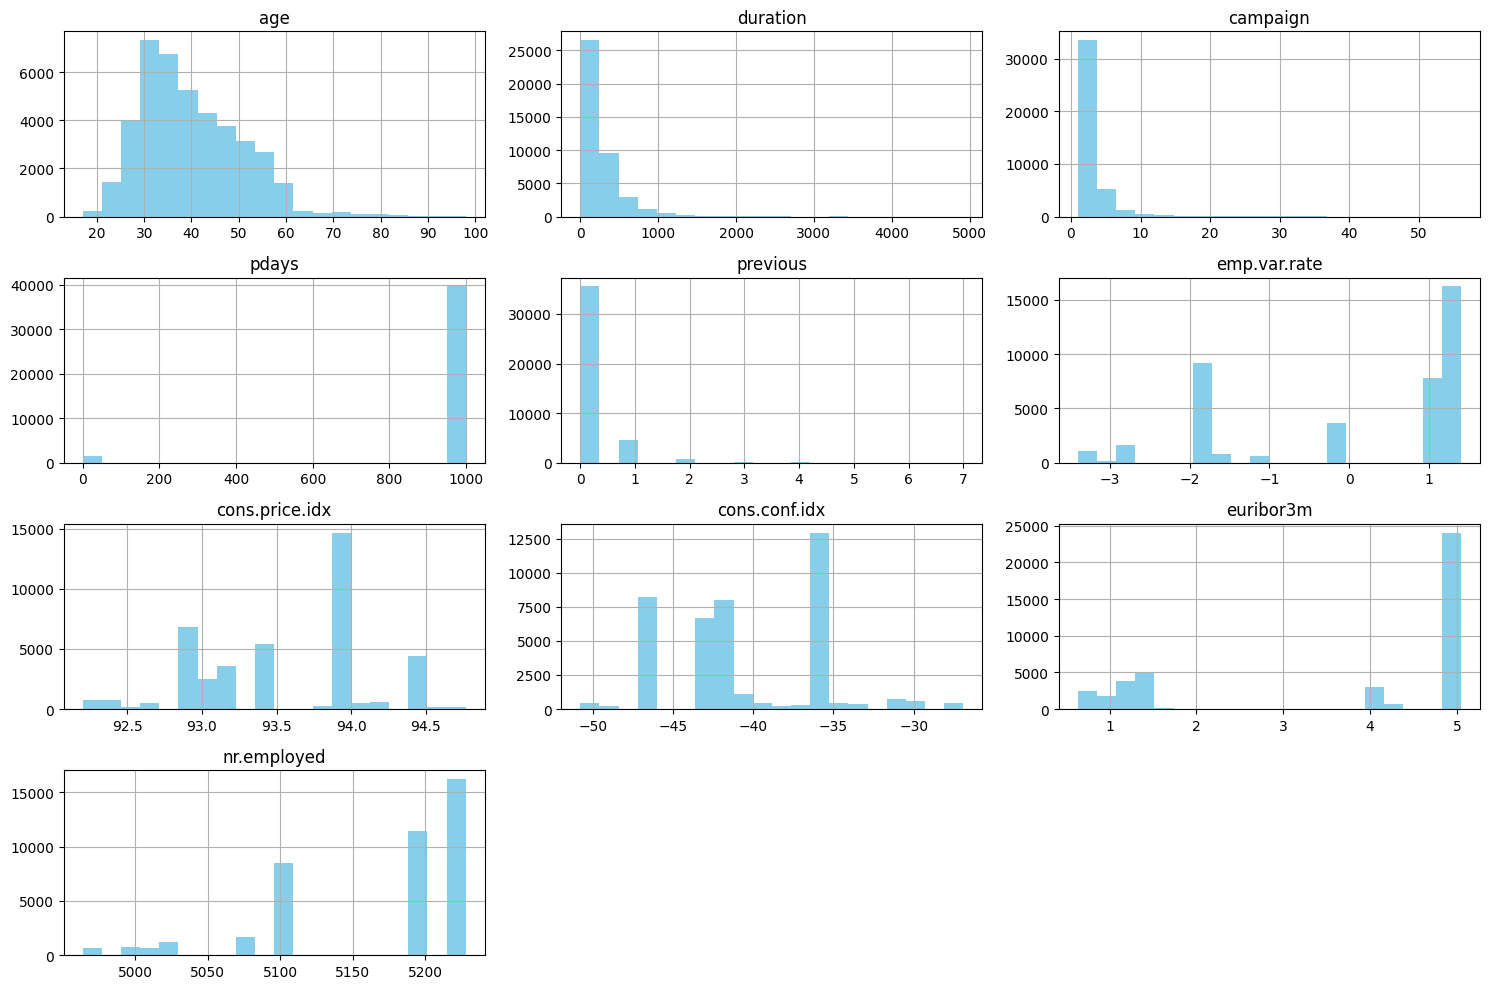

In [60]:
# Membuat plot persebaran data untuk kolom numerik
plt.figure(figsize=(12, 8))
bank_data[numerical].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.tight_layout()
plt.show()


#### Visualisasi dari kolom Categorical

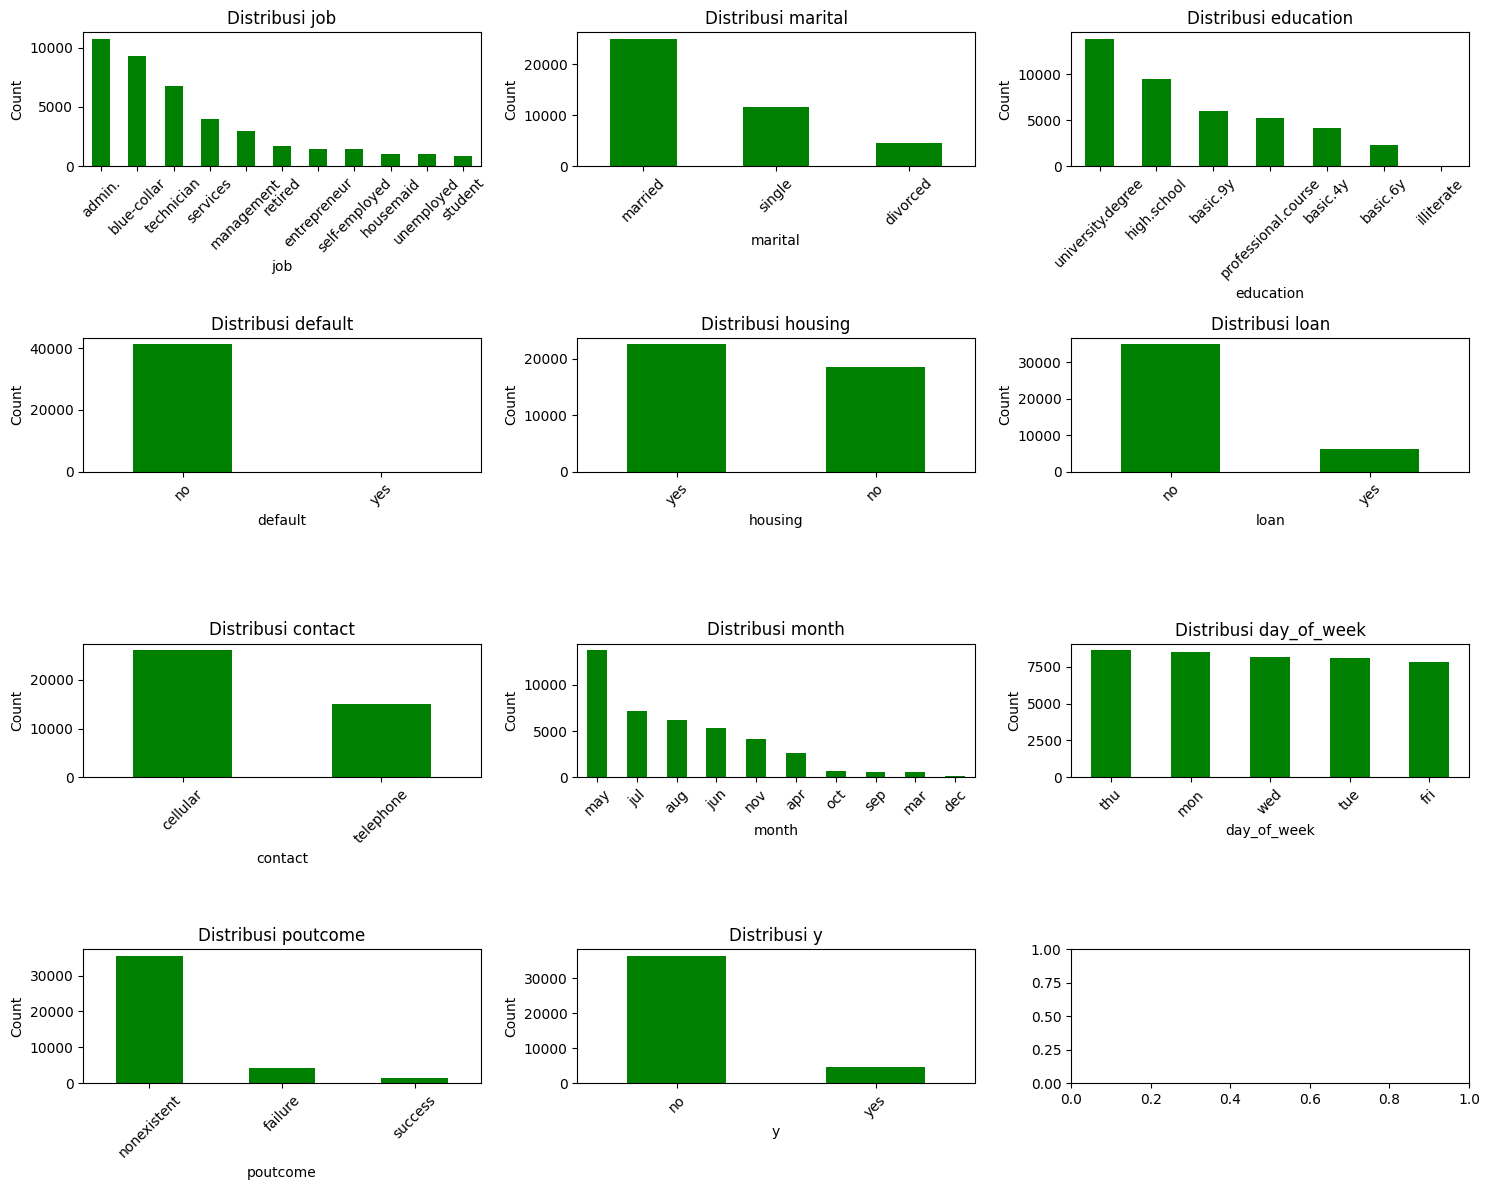

In [61]:
# Membuat plot persebaran data untuk kolom kategori

# Membuat plot count untuk setiap kolom kategorikal
fig, axes = plt.subplots(len(categorical)//3 + 1, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical):
    bank_data[col].value_counts().plot(kind='bar', ax=axes[i], color='green')
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [62]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### One hot Encoding

lakukan teknik one hot encoding pada kolom berikut (Nominal):
- job
- marital
- housing
- loan
- contact
- month
- day_of_week
- poutcome


In [63]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [64]:
nominal_columns = ['job', 'marital', 'housing', 'contact', 'month', 'day_of_week', 'poutcome']

In [65]:
# Menerapkan One-Hot Encoding pada kolom nominal
one_hot_encoding = pd.get_dummies(bank_data, columns=nominal_columns, drop_first=True)

# Menampilkan beberapa baris dari data yang telah diencoding
one_hot_encoding.head()


,age,education,default,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,basic.4y,no,no,261,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
1,57,high.school,no,no,149,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
2,37,high.school,no,no,226,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
3,40,basic.6y,no,no,151,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
4,56,high.school,no,yes,307,1,999,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False


In [66]:
# Identifikasi kolom yang bertipe bool
bool_columns = one_hot_encoding.select_dtypes(include='bool').columns

# Ubah kolom bertipe bool menjadi 1 dan 0
one_hot_encoding[bool_columns] = one_hot_encoding[bool_columns].astype(int)

### Ordinal Encoding

In [67]:
ordinal_columns = [col for col in categorical if col not in nominal_columns]
ordinal_columns

['education', 'default', 'loan', 'y']

In [68]:
ordinal_encoding = one_hot_encoding.loc[:,ordinal_columns]

encoder = LabelEncoder()

In [69]:
# label encoding
for ord_col in ordinal_columns:
    ordinal_encoding[ord_col] = encoder.fit_transform(ordinal_encoding[ord_col])

### Gabungkan data Ordinal & Nominal Encoding

In [70]:
one_hot_encoding.drop(['education', 'default', 'loan', 'y'], axis='columns', inplace=True)

In [71]:
bank_data_encoded = pd.concat([one_hot_encoding,ordinal_encoding],axis=1)
bank_data_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,education,default,loan,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,3,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,3,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,3,0,1,0


### Pembagian Data Set

In [72]:
X = bank_data_encoded.drop('y',axis=1)
y = bank_data_encoded['y']

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
print("Dimensi atribut data latih = ", X_train.shape)
print("Dimensi target data latih = ", y_train.shape)
print("Dimensi atribut data uji = ", X_test.shape)
print("Dimensi target data uji = ", y_test.shape)

Dimensi atribut data latih =  (32950, 42)
Dimensi target data latih =  (32950,)
Dimensi atribut data uji =  (8238, 42)
Dimensi target data uji =  (8238,)


### Normalisasi Data

In [75]:
standard_scaler = StandardScaler()

# fit scaler into train data
standard_scaler.fit(X_train)

# transform data with scaler
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [76]:



# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

# Store results for each model
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store evaluation metrics
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),
        "Classification Report": classification_report(y_test, y_pred, zero_division=0)
    }

results_df = pd.DataFrame(results).T
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']]

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.910051,0.899355,0.910051,0.901569
K-Nearest Neighbors,0.89682,0.882415,0.89682,0.886604
Support Vector Machine,0.909687,0.897752,0.909687,0.898819
Decision Tree,0.887594,0.889916,0.887594,0.888716
Random Forest,0.912479,0.904821,0.912479,0.90732
Naive Bayes,0.73076,0.890619,0.73076,0.778419


### Evaluasi Model

1. **Random Forest** memiliki score terbaik dengan **akurasi tertinggi**

2. **Logistic Regression** dan **Support Vector Machine (SVM)** juga menunjukkan performa yang baik, dengan akurasi mendekati Random Forest. Kedua model ini memiliki metrik yang cukup tinggi di precision, recall, dan F1 Score, menunjukkan bahwa mereka juga merupakan pilihan model yang solid.

3. **K-Nearest Neighbors (KNN)** dan **Decision Tree** memiliki performa yang sedikit lebih rendah dibandingkan model di atas. Meskipun lebih rendah, kedua model ini masih menunjukkan hasil yang cukup baik dan dapat dipertimbangkan jika ada kebutuhan khusus untuk model yang lebih sederhana atau interpretabilitas yang lebih tinggi (seperti Decision Tree).

4. **Naive Bayes** memiliki performa terendah. Ini menunjukkan bahwa Naive Bayes mungkin kurang cocok untuk dataset ini.

### Kesimpulan Akhir:
Random Forest adalah model terbaik untuk dataset ini, diikuti oleh Logistic Regression dan SVM. Jika akurasi tinggi dan performa yang konsisten diperlukan, Random Forest adalah pilihan yang paling direkomendasikan.